# **Download the data from Kaggle**

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucky66","key":"7337b4c781a18e975b44691a2420ba4c"}'}

In [0]:
ls

'kaggle (1).json'   kaggle.json   sample_data/


In [0]:
!mkdir /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [0]:
!ls /root/.kaggle/

kaggle.json


In [0]:
!mv kaggle.json /root/.kaggle/

In [0]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 93.8MB/s]
 38% 9.00M/23.4M [00:00<00:00, 28.8MB/s]
100% 23.4M/23.4M [00:00<00:00, 52.9MB/s]
 34% 9.00M/26.3M [00:00<00:00, 25.7MB/s]
100% 26.3M/26.3M [00:00<00:00, 59.4MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 211MB/s]


In [0]:
ls

'kaggle (1).json'   sample_submission.csv.zip   test_labels.csv.zip
 sample_data/       test.csv.zip                train.csv.zip


In [0]:
!mkdir ToxicComment

In [0]:
ls

sample_data/               test.csv.zip         ToxicComment/
sample_submission.csv.zip  test_labels.csv.zip  train.csv.zip


In [0]:
!unzip test.csv.zip -d ./ToxicComment
!unzip test_labels.csv.zip -d ./ToxicComment
!unzip train.csv.zip -d ./ToxicComment
!unzip sample_submission.csv.zip -d ./ToxicComment

Archive:  test.csv.zip
  inflating: ./ToxicComment/test.csv  
Archive:  test_labels.csv.zip
  inflating: ./ToxicComment/test_labels.csv  
Archive:  train.csv.zip
  inflating: ./ToxicComment/train.csv  
Archive:  sample_submission.csv.zip
  inflating: ./ToxicComment/sample_submission.csv  


In [0]:
!ls ./ToxicComment

sample_submission.csv  test.csv  test_labels.csv  train.csv


In [0]:
!head ./ToxicComment/train.csv

"id","comment_text","toxic","severe_toxic","obscene","threat","insult","identity_hate"
"0000997932d777bf","Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
"000103f0d9cfb60f","D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
"000113f07ec002fd","Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
"0001b41b1c6bb37e","""
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents""""  -I think the refere

In [0]:
!head ./ToxicComment/test.csv

"id","comment_text"
"00001cee341fdb12","Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
"0000247867823ef7","== From RfC == 

 The title is fine as it is, IMO."
"00013b17ad220c46",""" 

 == Sources == 

 * Zawe Ashton on Lapland —  /  """


In [0]:
!head ./ToxicComment/test_labels.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,-1,-1,-1,-1,-1,-1
0000247867823ef7,-1,-1,-1,-1,-1,-1
00013b17ad220c46,-1,-1,-1,-1,-1,-1
00017563c3f7919a,-1,-1,-1,-1,-1,-1
00017695ad8997eb,-1,-1,-1,-1,-1,-1
0001ea8717f6de06,0,0,0,0,0,0
00024115d4cbde0f,-1,-1,-1,-1,-1,-1
000247e83dcc1211,0,0,0,0,0,0
00025358d4737918,-1,-1,-1,-1,-1,-1


In [0]:
!head ./ToxicComment/sample_submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
0001ea8717f6de06,0.5,0.5,0.5,0.5,0.5,0.5
00024115d4cbde0f,0.5,0.5,0.5,0.5,0.5,0.5
000247e83dcc1211,0.5,0.5,0.5,0.5,0.5,0.5
00025358d4737918,0.5,0.5,0.5,0.5,0.5,0.5


# Preprocess the data

In [0]:
import pandas as pd

In [0]:
train_df = pd.read_csv('./ToxicComment/train.csv', header=0)

In [0]:
train_df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [0]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


In [0]:
words_to_stem=train_df["comment_text"]
words_to_stem.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [0]:
words_to_stem.values

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [0]:
#Tokenize the "words_to_stem" using Word tokenizer
tokenized = [word_tokenize(w) for w in words_to_stem.values]

In [0]:
type(tokenized)

list

In [0]:
tokenized[0]

['Explanation',
 'Why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'Hardcore',
 'Metallica',
 'Fan',
 'were',
 'reverted',
 '?',
 'They',
 'were',
 "n't",
 'vandalisms',
 ',',
 'just',
 'closure',
 'on',
 'some',
 'GAs',
 'after',
 'I',
 'voted',
 'at',
 'New',
 'York',
 'Dolls',
 'FAC',
 '.',
 'And',
 'please',
 'do',
 "n't",
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'I',
 "'m",
 'retired',
 'now.89.205.38.27']

In [0]:
tokenized[0][0]

'Explanation'

In [0]:
ps= PorterStemmer()

In [0]:
last_word = ""
for i in range(len(tokenized)):
  for j in range(len(tokenized[i])):
    if (len(tokenized[i][j]) < 200):
      tokenized[i][j] = ps.stem(tokenized[i][j])

In [0]:
#Convert from "list of list of strings" to "list of strings"
tokenized=[' '.join(x) for x in tokenized]

In [0]:
print(tokenized[0])

explan whi the edit made under my usernam hardcor metallica fan were revert ? they were n't vandal , just closur on some ga after I vote at new york doll fac . and pleas do n't remov the templat from the talk page sinc I 'm retir now.89.205.38.27


In [0]:
#Keras "Tokenizer"
tokenizer = Tokenizer(num_words=50000, lower=True)
#tokenizer = Tokenizer(num_words=50000, lower=True, oov_token = "<OOV>")

In [0]:
#tokenizer.fit_on_texts(train_df["comment_text"])
tokenizer.fit_on_texts(tokenized)

In [0]:
#word_index = tokenizer.word_index

In [0]:
#type(word_index)

In [0]:
#word_index['explan']

In [0]:
#Vectorize the text samples into a 2D integer tensor
#replaces each word with particular numbers
sequences = tokenizer.texts_to_sequences(tokenized)

In [0]:
sequences[0]

[645,
 89,
 1,
 37,
 153,
 208,
 33,
 694,
 3782,
 8706,
 820,
 98,
 145,
 55,
 98,
 27,
 144,
 58,
 5136,
 17,
 70,
 961,
 171,
 4,
 583,
 39,
 135,
 1193,
 8579,
 2077,
 6,
 53,
 22,
 27,
 100,
 1,
 315,
 35,
 1,
 38,
 28,
 167,
 4,
 87,
 2003,
 105,
 2676,
 3801,
 2030,
 1010]

In [0]:
#Keep max length of each sentence to be 1000. Sentences with less than 1000 words are padded with zeroes & sentences with more than 1000 words are cut off after 1000 words.
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=1000)

In [0]:
sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [0]:
y=train_df.iloc[:, 2:]
y.tail()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0
159570,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
#Split data into Train & Test data
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2, random_state=42)

In [0]:
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D

In [0]:
# Load word embeddings into an Embedding layer
# Note that we set trainable = True so as to keep the embeddings not fixed
embedding_layer = Embedding(50000, 128, input_length=1000, trainable=True)#the model will take as input an integer matrix of size (batch, input_length)
# The largest integer (i.e. word index) in the input should be no larger than 49999 (vocabulary size)
# Now model.output_shape == (None, 1000, 128), where None is the batch dimension

# Modelling

In [0]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(1000,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(256, 4, activation='relu')(embedded_sequences)#number of channels, kernel size
x = MaxPooling1D(3)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(3)(x)
#x = Conv1D(32, 5, activation='relu')(x3)
#x = GlobalMaxPooling1D()(x)
x = Flatten(data_format=None)(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
preds = Dense(6, activation='sigmoid')(x)

model = Model(sequence_input, preds)
#model.compile(optimizer='rmsprop', loss='mean_absolute_error')
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 127656 samples, validate on 31915 samples
Epoch 1/5





127656/127656 [==============================] - 125s 979us/step - loss: 0.0886 - val_loss: 0.0722
Epoch 2/5
127656/127656 [==============================] - 119s 930us/step - loss: 0.0729 - val_loss: 0.0748
Epoch 3/5
127656/127656 [==============================] - 119s 931us/step - loss: 0.0703 - val_loss: 0.0728
Epoch 4/5
127656/127656 [==============================] - 119s 931us/step - loss: 0.0690 - val_loss: 0.0851
Epoch 5/5
127656/127656 [==============================] - 119s 931us/step - loss: 0.0679 - val_loss: 0.0822


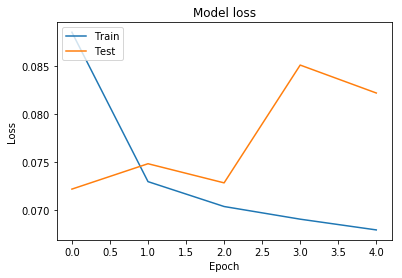

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()